In [ ]:
#import pandas as pd
#import scipy.stats as stats


In [ ]:
#data = {'area1': [6.2,9.3,6.8,6.1,6.7,7.5]
#        , 'area2': [7.5, 8.2, 8.5, 8.2, 7, 9.3]
#        , 'area3': [5.8,6.4,5.6,7.1,3,3.5]}

#food = pd.DataFrame(data=data)


In [ ]:
#result = stats.f_oneway(food['area1'], food['area2'], food['area3'])
#print('F-statistic: {:.3f}, p-value: {:.5f}'.format( result[0], result[1] ))

# Question 3

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
#np.genfromtxt('challenger.txt', skip_header=1, usecols=[1, 2], missing_values='NA', delimiter=',')
shuttle = pd.read_csv("spaceshuttle.txt", sep = "\t")
#pd.DataFrame(challenger_data,columns=('tem','outcome'))

shuttle['failure'] = np.where(shuttle['Damaged']==0, 0, 1)
shuttle


,Damaged,Temp,failure
0,2,53,1
1,1,57,1
2,1,58,1
3,1,63,1
4,0,66,0
5,0,67,0
6,0,67,0
7,0,67,0
8,0,68,0
9,0,69,0


### Question 3a

(a)	Fit a logistic regression connecting the probability of O-rings failure (2 or 1 damaged are both considered as failures) with temperature. Interpret the coefficients

In [2]:
import statsmodels.formula.api as smf
import math

logit = smf.logit('failure~Temp',shuttle).fit()
print(logit.summary())


#convert output to %

params = logit.params
conf = logit.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))


Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                  0.2813
Time:                        09:44:24   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0429      7.379      2.039      0.041       0.581      29.505
Temp          -0.2322      0.

### Interpretation of coefficient
The logistic regression of Failure~Temp has coefficient -0.2322 for Temp parameter.

For every 1 Farenheit increase in temperature, the odds of the o-rings failing for a given launch decreases by a factor of 0.79. In the other words, the odds of an o-ring failure during launch decrease by 21% (1-0.79).




### Question 3b

In [3]:
shuttle_no75 = shuttle.drop(17)
logit_no75 = smf.logit('failure~Temp',shuttle_no75).fit()
print(logit_no75.summary())


params = logit_no75.params
conf = logit_no75.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'OR']
print(np.exp(conf))
print("e^coefficient", np.exp(params[1]))


Optimization terminated successfully.
         Current function value: 0.326749
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                failure   No. Observations:                   22
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                  0.4424
Time:                        18:15:39   Log-Likelihood:                -7.1885
converged:                       True   LL-Null:                       -12.891
Covariance Type:            nonrobust   LLR p-value:                 0.0007325
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4033     11.832      1.978      0.048       0.214      46.593
Temp          -0.3610      0.

### Interpretation of coefficient
The logistic regression of Failure~Temp has coefficient -0.361 for the Temp parameter
The correct interpretation is that the odds ratio is multiplied by e^-0.3610 for each unit increase in temperature
Thus for each 1 degree increase in temperature the odds ratio is multiplied by 0.696964
This means that as the temperature decreases the chance of failure increases by approximately 70%



### Question 3c

In [4]:
predictions = logit_no75.predict()
shuttle_no75['pred']=[ "0.0" if x < 0.5 else "1.0" for x in predictions]
shuttle_no75.drop(['Damaged'], axis=1)

logit_31 = smf.logit('failure~Temp',shuttle_no75).fit()

print(logit_31.summary())



Optimization terminated successfully.
         Current function value: 0.326749
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                failure   No. Observations:                   22
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                  0.4424
Time:                        19:58:16   Log-Likelihood:                -7.1885
converged:                       True   LL-Null:                       -12.891
Covariance Type:            nonrobust   LLR p-value:                 0.0007325
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4033     11.832      1.978      0.048       0.214      46.593
Temp          -0.3610      0.

In [8]:
alpha = logit_31.params[0]
beta = logit_31.params[1]
y = np.exp(np.dot(beta, 31) + alpha)/ (1.0 + np.exp(np.dot(beta, 31) + alpha))
print("The probability of an O-ring failure when the temperature at launch was 31 degrees Fahrenheit is {:.4%}".format(y))      
# format(np.exp(23.0055-0.3549*31)/(1+np.exp(23.0055-0.3549*31))))


The probability of an O-ring failure when the temperature at launch was 31 degrees Fahrenheit is 99.9995%


### Question 3d

The overall correct classification rate is: 0.9090909090909091


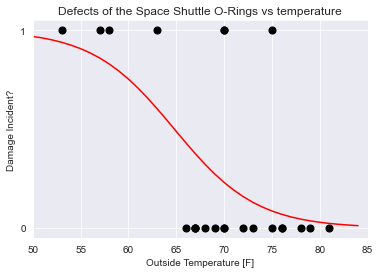

,Damaged,Temp,failure
0,2,53,1
1,1,57,1
2,1,58,1
3,1,63,1
4,0,66,0
5,0,67,0
6,0,67,0
7,0,67,0
8,0,68,0
9,0,69,0


In [10]:
import matplotlib.pyplot as plt
prediction_31 = logit_31.predict()

shuttle_no75['pred']=[ 0 if x < 0.5 else 1 for x in predictions]
shuttle_no75

print('The overall correct classification rate is:', 1-abs(shuttle_no75['failure']-shuttle_no75['pred']).sum()/logit_no75.nobs)

x = np.arange(50, 85)
alpha = logit.params[0]
beta = logit.params[1]
y = np.exp(np.dot(beta, x) + alpha)/ (1.0 + np.exp(np.dot(beta, x) + alpha))
# First plot the original data
plt.figure()
sns.set_style('darkgrid')
np.set_printoptions(precision=3, suppress=True)

plt.scatter(shuttle['Temp'], shuttle['failure'], s=50, color="k", alpha=1)
plt.xlim([50, 85])
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside Temperature [F]")
plt.title("Defects of the Space Shuttle O-Rings vs temperature")
plt.tight_layout

plt.plot(x,y,'r')
plt.show()

shuttle

### Would you have advised the launching on that particular day?

As the prediction shown above, the trend for all launches shows a clear negative dependence between temperature and failures.

The minimum temperature for a launch without incidents ever recorded was above  
66 Farenheit and the Challenger was launched at 31 Farenheit which clearly not advisable due to the effects of such low temperatures.

# Question 4

### Question 4a

In [11]:
# newton r
# Original author: Patrick Walls
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    
    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None


f = lambda x: -30*x**2 - 20*x + 20
Df = lambda x: -60*x - 20
print(newton(f,Df,1,0.1,10))
#print(newton(f,Df,-1,0.1,10))

Found solution after 3 iterations.
0.5485890147300966


### Question 4b

In [12]:
####data
z=[10,10,10]

####initial guess
theta0=0.1

####E-step
####Q function###

z_12=z[0]*theta0/(2+theta0)
Qfn=(z_12+z[2])*np.log(theta0)+(z[1])*np.log(1-theta0)
####M-step
theta1=(z_12+z[2])/(z_12+z[2]+z[1])
####
print('z_12= ', z_12)
#print('Qfn1= ', Qfn)
print('EM algorithm update: theta1=',theta1)

theta_1 = 0.5116279069767442

z_12=z[0]*theta_1/(2+theta_1)
Qfn=(z_12+z[2])*np.log(theta_1)+(z[1])*np.log(1-theta_1)
####M-step
theta2=(z_12+z[2])/(z_12+z[2]+z[1])
####
print('z_12= ', z_12)
#print('Qfn1= ', Qfn)
print('EM algorithm update: theta2=',theta2)

theta_2 = 0.546218487394958

z_12=z[0]*theta_2/(2+theta_2)
Qfn=(z_12+z[2])*np.log(theta_2)+(z[1])*np.log(1-theta_2)
####M-step
theta3=(z_12+z[2])/(z_12+z[2]+z[1])
####
print('z_12= ', z_12)
#print('Qfn1= ', Qfn)
print('EM algorithm update: theta3=',theta3)



z_12=  0.47619047619047616
EM algorithm update: theta1= 0.5116279069767442
z_12=  2.037037037037037
EM algorithm update: theta2= 0.546218487394958
z_12=  2.145214521452145
EM algorithm update: theta3= 0.548435171385991


In [13]:
def EM(lf,Qf,theta0,epsilon,max_iter):
    '''Approximate solution of MLE by EM algorithm.

    Parameters
    ----------
    lf  : derivative of loglikilhood function
    Qf  : surrogate function after introducing missing data
        The expected value of the log likelihood function.
    theta0 : number
        Initial guess for the MLE.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    thetan : number
        Implement EM algorithm: compute Qfn, the expected value of the log likelihood function,
        at the E-step and update thetan by maximising the Qfn at the M-step.
            
        Continue until abs(lf(thetan)) < epsilon and return thetan.    
    '''
    lfnval=[]
    Qfnval=[]
    thetan = theta0
    for n in range(0,max_iter):
        lfn= lf(thetan)
        Qfn = Qf(thetan)
        lfnval.append(lfn)
        Qfnval.append(Qfn)
        z_12=z[0]*thetan/(2+thetan)
        thetan=(z_12+z[2])/(z_12+z[2]+z[1])
        if abs(lfn) < epsilon:
            print('Found solution after',n,'iterations.')
            return (thetan,lfnval,Qfnval)
        
    print('Exceeded maximum iterations. No solution found.')
    return None

In [14]:
# EM Algorithm

z = [10,10,10]
lf = lambda theta: z[0]/(2+theta)-(z[1]/(1-theta))+z[2]/theta
Qf = lambda theta: (z[0]*(1-theta)*theta-z[1]*(2+theta)*theta + z[2]*(2+theta)*(1-theta))
EM(lf,Qf,0.1,1e-4,1000)


Found solution after 5 iterations.


(0.5485837336425377,
 [93.65079365079364,
  3.050745550745546,
  0.19804800992919525,
  0.012457738908910443,
  0.0007817975046684467,
  4.905520457043622e-05],
 [17.700000000000003,
  1.9145484045429946,
  0.1249911729397617,
  0.007862455884740882,
  0.0004934161008627314,
  3.096022643944707e-05])

In [ ]:
#def EM(x):
#    ff = -30*x**2-20*x+20
#    df = -60*x-20
#    print("f(x)", ff)
#    print("f'(x)", df)
#    print("final ", x-(ff/df))
#EM(0.5489067819114077)

# Question 5 

### Question 5a & 5b

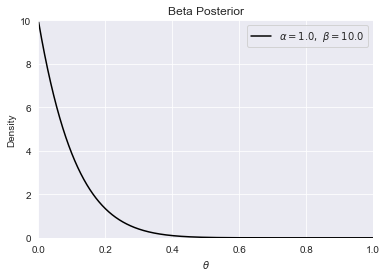

The 95% percentile of Beta(1,10) is: 0.25886555089305224
The 95% HDI for theta is: (0, 0.25886555089305224)


In [15]:
###The plot of the pdf of Beta (1,10)
import scipy.stats as stats
from matplotlib import pyplot as plt

X=stats.beta(1, 10)
x = np.linspace(0, 1, 1002)[1:-1]
plt.plot(x, X.pdf(x), ls='-', c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (1, 10))
plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title('Beta Posterior')

plt.legend(loc=0)
plt.show()
print('The 95% percentile of Beta(1,10) is:',X.ppf(0.95))
print('The 95% HDI for theta is:',(0,X.ppf(0.95)))

In [ ]:
#obj1 = math.exp(logit.params[1])
#print("When temperature decreases by 1 unit, the probability of failure increases by {0:.0%}".format(obj1))

#result_line1 = """This means that, when the temperature is zero, the fitted odds is """ 
#result_line2 = """so the (estimated) probability of having an incident (failure=1) is """ 
#result_line3 = """times larger than the probability of not having an incident (failure=0).
#In other words, the probability of having an incident at temperature zero is """ 

#print(result_line1, params[0],result_line2, np.exp(params[0]), result_line3, np.exp(params[0])/(np.exp(params[0])+1))
#np.exp(params[0])/(np.exp(params[0])+1)

print(np.exp(params[1]))
#print("These results indicate, with statistical significance at the 95% confidence level, that a 1 degree increase in temperature decreases the odds of a failure by ",obj1)